# Examples

#### Jan Nogué Gómez

### Master in Quantum Science and Technology UB

In this file we will test several examples of the Turing Machine

In [1]:
from ClassTM import TuringMachine
import random
import pandas as pd

This Turing Machine takes a list of unsorted integers and returns the sorted array in ascending order. The elements of the list can be repeated. If the elements of the list are already sorted, it returns the same list.

In [3]:
program = open('file.txt').read() #Read the file with all the transition functions

### Examples
1. Input Tape = [1,2,3,4,5,6,7,8,9,10]



In [3]:
input_tape = [1,2,3,4,5,6,7,8,9,10]
print(f"Input Tape: {input_tape}")

Input Tape: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]


In [4]:
tm = TuringMachine(program, input_tape)
print("Initial tapes of the Turing Machine:")
tm.print_tapes()
iteration = tm.run()


Initial tapes of the Turing Machine:
Input Tape:  __S0001_0010_0011_0100_0101_0110_0111_1000_1001_1010E__
Working tape: __S___________________________________________________
Track Tape: __S_________________________________________________E__
Output Tape: __S_________________________________________________H__


In [5]:
print("Final tapes of the Turing Machine:")
tm.print_tapes()
print("Convert the output tape to a list of integers again:")
tm.print_solution()

Final tapes of the Turing Machine:
Input Tape:  __S_____________________________________________1010E__
Working tape: __S1010_______________________________________________
Track Tape: __S_____________________________________________XXXXE__
Output Tape: __S0001_0010_0011_0100_0101_0110_0111_1000_1001_1010H__
Convert the output tape to a list of integers again:
Ouput Tape: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
State: H, Iterations: 2106


2. Input Tape = [10,9,8,7,6,5,4,3,2,1]

In [6]:
input_tape = [10,9,8,7,6,5,4,3,2,1]
print(f"Input Tape: {input_tape}")

Input Tape: [10, 9, 8, 7, 6, 5, 4, 3, 2, 1]


In [7]:
tm = TuringMachine(program, input_tape)
print("Initial tapes of the Turing Machine:")
tm.print_tapes()
iteration = tm.run()

Initial tapes of the Turing Machine:
Input Tape:  __S1010_1001_1000_0111_0110_0101_0100_0011_0010_0001E__
Working tape: __S___________________________________________________
Track Tape: __S_________________________________________________E__
Output Tape: __S_________________________________________________H__


In [8]:
print("Final tapes of the Turing Machine:")
tm.print_tapes()
print("Convert the output tape to a list of integers again:")
tm.print_solution()

Final tapes of the Turing Machine:
Input Tape:  __S1010_____________________________________________E__
Working tape: __S1010_______________________________________________
Track Tape: __SXXXX_____________________________________________E__
Output Tape: __S0001_0010_0011_0100_0101_0110_0111_1000_1001_1010H__
Convert the output tape to a list of integers again:
Ouput Tape: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
State: H, Iterations: 6509


Here I present the code to generate a random array of $N$ elements, for the user to play with. Note that the value maximum sets the upper bound for the number $N$ and that, if the users tries to generate $N$ > $UB-1$ it will raise a ValueError.
1. Please run the three consecutive cells to obtain the sorted array for the random input tape

In [9]:
N=6 #number of elements
UB= 8 #Upper bound of the elements
input_tape = random.sample(range(1,UB),N)
print(f"Input Tape: {input_tape}")

Input Tape: [7, 4, 6, 3, 1, 5]


In [10]:
tm = TuringMachine(program, input_tape)
print("Initial tapes of the Turing Machine:")
tm.print_tapes()
iteration = tm.run()

Initial tapes of the Turing Machine:
Input Tape:  __S111_100_110_011_001_101E__
Working tape: __S_________________________
Track Tape: __S_______________________E__
Output Tape: __S_______________________H__


In [11]:
print("Final tapes of the Turing Machine:")
tm.print_tapes()
print("Convert the output tape to a list of integers again:")
tm.print_solution()

Final tapes of the Turing Machine:
Input Tape:  __S111____________________E__
Working tape: __S111______________________
Track Tape: __SXXX____________________E__
Output Tape: __S001_011_100_101_110_111H__
Convert the output tape to a list of integers again:
Ouput Tape: [1, 3, 4, 5, 6, 7]
State: H, Iterations: 1181


### Study of the worse, average and best case scenario

In this scenario we generated randoms arrays of different sizes and sorted them in descending, asceding and random order to study the complexity of the algorithm:
1. To sort the Input Tape in descending order before entering the Turing Machine, we used *input_tape.sort(reverse=True)*: It took 520min
2. To sort the Input Tape in ascending order before entering the Turing Machine, we used *input_tape.sort()*. It took less than 2 minuts
3. For the case of average complexity, it took 6min

In [20]:
input_sizes = [10, 100, 200, 300, 400, 500, 600, 700, 800, 900,1000]

headers = ['Input Size', 'Lenght', 'Number of Iterations']
df = pd.DataFrame(columns=headers)

for size in input_sizes:
        input_tape = random.sample(range(1,1000),size)
        #input_tape.sort(reverse=True) #Worst case, sorted in decreasing order
        #input_tape.sort() #Best case, sorted in increasing order
        tm = TuringMachine(program, input_tape)
        initial_array = tm.initial_state()
        iteration = tm.run()
        print(f"Number of iterations: {iteration}")
        print(f"Initial state length: {len(initial_array)}")
        row = {"Input Size": size, "Lenght": len(initial_array), "Number of Iterations": iteration}
        new_df = pd.DataFrame(row, columns=headers, index = [0])
      
        
        df = pd.concat([df, new_df], ignore_index=True)

        df.to_csv('average_case.txt',sep=' ', index=False, header = False)
    


Number of iterations: 6589
Initial state length: 115
Number of iterations: 542046
Initial state length: 1105
Number of iterations: 2140402
Initial state length: 2205
Number of iterations: 4693551
Initial state length: 3305
Number of iterations: 8306606
Initial state length: 4405
Number of iterations: 13629475
Initial state length: 5505
Number of iterations: 18690326
Initial state length: 6605
Number of iterations: 25729317
Initial state length: 7705
Number of iterations: 33476415
Initial state length: 8805
Number of iterations: 42349449
Initial state length: 9905


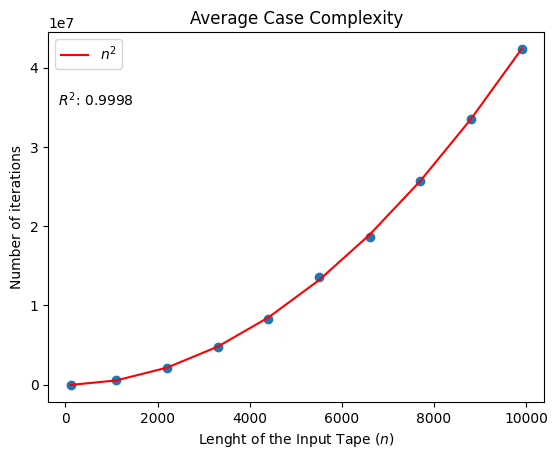

In [24]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt

# read data from file
with open('average_case.txt') as f:
    data = [list(map(int, line.split())) for line in f]

# extract second and third columns
x = np.array([row[1] for row in data]).reshape(-1, 1)
y = np.array([row[2] for row in data])

# fit a 3rd-degree polynomial
poly = PolynomialFeatures(degree=2)
x_poly = poly.fit_transform(x)
model = LinearRegression()
model.fit(x_poly, y)

# calculate MSE
y_pred = model.predict(x_poly)
r_squared = r2_score(y, y_pred)

# plot the data and the polynomial curve
fig, ax = plt.subplots()
ax.scatter(x, y)
ax.plot(x, y_pred,label = r"$n^2$",color='red')
ax.set_xlabel(r'Lenght of the Input Tape ($n$)')
ax.set_ylabel('Number of iterations')
ax.text(0.02, 0.8, f'$R^2$: {r_squared:.4f}', transform=ax.transAxes)
ax.legend()
ax.title.set_text('Average Case Complexity')
plt.savefig("average_case.pdf")
plt.show()
